In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (60000, 784)
X_test shape:  (10000, 784)


In [3]:
class PCA:
    
    def __init__(self, n_components):
        
        self.n_components = n_components
        
    def fit(self, X):
        covar_mat = np.cov(X, rowvar=False)
        self.eig_values, self.eig_vectors = np.linalg.eig(covar_mat)
        
    def transform(self, X):
        return X.dot(self.eig_vectors[:, :self.n_components])

In [4]:
pca = PCA(n_components=3)
pca.fit(X_train)
transformed_x = pca.transform(X_train)

/home/alperen/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


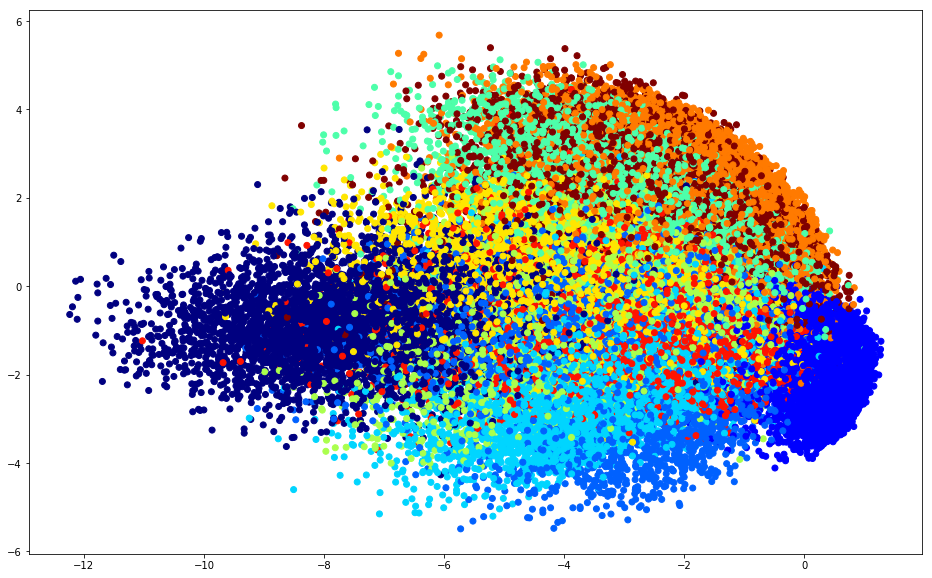

In [5]:
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

plt.figure(figsize=(16, 10))
plt.scatter(transformed_x[:, 0], transformed_x[:, 1], c=y_train, cmap=cmap)
plt.show()

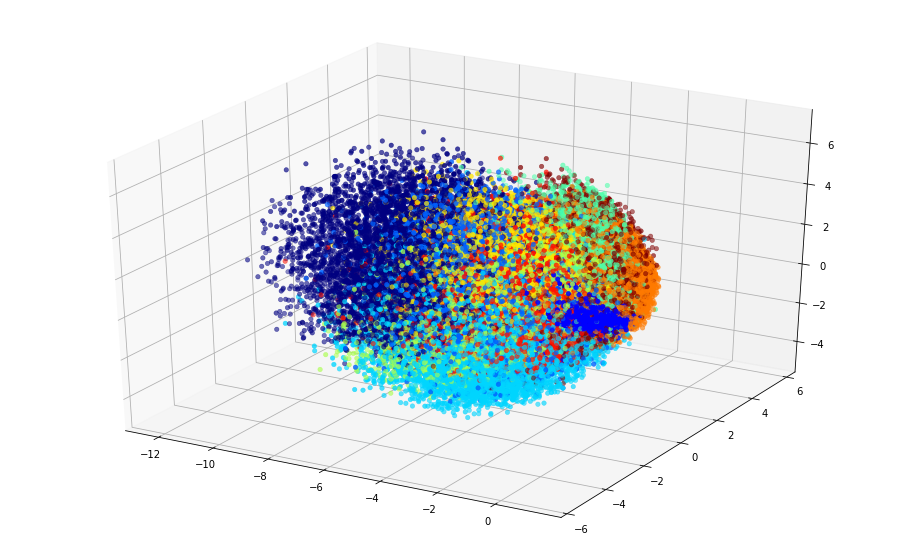

In [6]:
transformed_x = transformed_x.real

plt.figure(figsize=(16, 10))
ax = plt.axes(projection='3d')
ax.scatter(transformed_x[:, 0], transformed_x[:, 1], transformed_x[:, 2], 
           c=y_train, cmap=cmap, linewidth=0.5);

In [7]:
# Sklearn way
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X_train)
transformed_x = pca.transform(X_train)

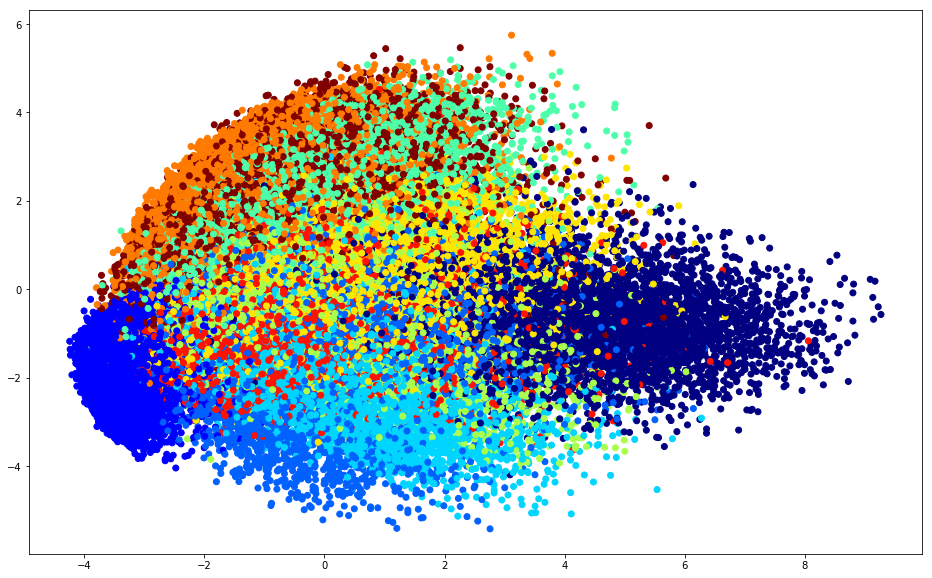

In [8]:
plt.figure(figsize=(16, 10))
plt.scatter(transformed_x[:, 0], transformed_x[:, 1], c=y_train, cmap=cmap)
plt.show()

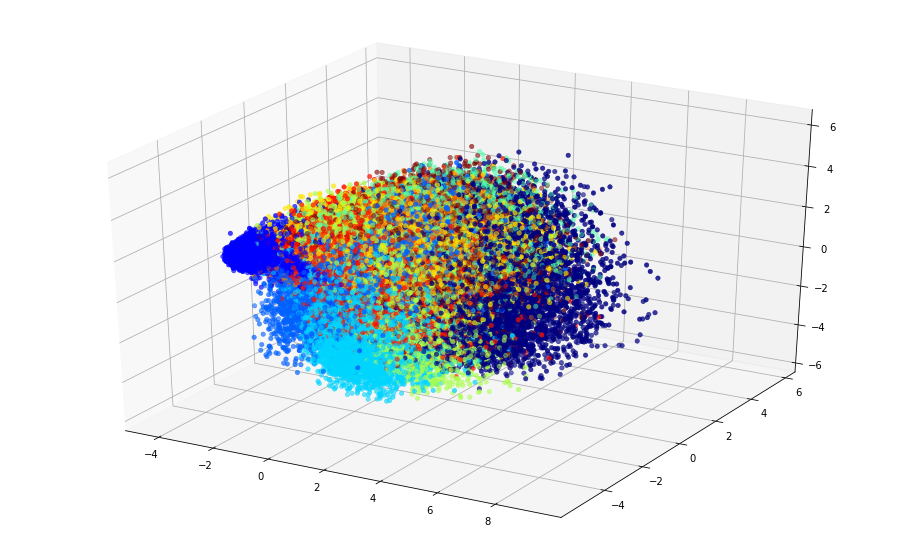

In [9]:
plt.figure(figsize=(16, 10))
ax = plt.axes(projection='3d')
ax.scatter(transformed_x[:, 0], transformed_x[:, 1], transformed_x[:, 2], 
           c=y_train, cmap=cmap, linewidth=0.5);